<a href="https://colab.research.google.com/github/Vijay3alaji/data_science/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy
import joypy

In [ ]:
file_path = '/content/laptop_price - dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
data

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [ ]:
# Check for null values
null_values = data.isnull().sum()
print("Null values in the dataset:")
print(null_values)


Null values in the dataset:
Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64


In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outliers = detect_outliers(data, column)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers detected in {column}")


Outliers in Inches:
       Company                               Product            TypeName  \
20        Asus                       Vivobook E200HA             Netbook   
50      Lenovo                             Yoga Book  2 in 1 Convertible   
177        MSI                       GT80S 6QF-074US              Gaming   
314       Asus                         VivoBook Flip  2 in 1 Convertible   
319       Acer                          TravelMate B            Notebook   
348       Asus                         VivoBook Flip  2 in 1 Convertible   
376     Lenovo                              Yoga 11e             Netbook   
409     Lenovo                        Lenovo IdeaPad            Notebook   
429   Mediacom                         FlexBook Edge  2 in 1 Convertible   
430    Samsung                          Chromebook 3             Netbook   
455       Dell                         Inspiron 3168  2 in 1 Convertible   
461       Acer                          TravelMate B             Net

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [ ]:
print(data['Memory'].unique())

# Function to convert memory storage values to GB, handling TB as well
def convert_memory_size(memory):
    memory = memory.strip()
    if 'TB' in memory:
        return int(float(memory.split('TB')[0].strip()) * 1000)
    elif 'GB' in memory:
        return int(memory.split('GB')[0].strip())
    return 0

def extract_storage(memory):
    if not isinstance(memory, str):
        return 0, 0

    ssd = 0
    hdd = 0
    try:
        parts = memory.split(' + ')  # Split by " + " to get both SSD and HDD if present
        for part in parts:
            part = part.strip()
            if 'SSD' in part:
                ssd = convert_memory_size(part)
            elif 'HDD' in part:
                hdd = convert_memory_size(part)
    except Exception as e:
        print(f"Error processing memory: {memory}, Error: {e}")

    return ssd, hdd

data['SSD'], data['HDD'] = zip(*data['Memory'].apply(extract_storage))

laptop_data_cleaned = data.drop(columns=['Memory'])

laptop_data_cleaned.head()

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),SSD,HDD
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,128,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,Intel,HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,Intel,HD Graphics 620,No OS,1.86,575.00,256,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,AMD,Radeon Pro 455,macOS,1.83,2537.45,512,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,256,0


In [ ]:
laptop_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   GPU_Company          1275 non-null   object 
 10  GPU_Type             1275 non-null   object 
 11  OpSys                1275 non-null   object 
 12  Weight (kg)          1275 non-null   float64
 13  Price (Euro)         1275 non-null   float64
 14  SSD                  1275 non-null   int64  
 15  HDD                  1275 non-null   i

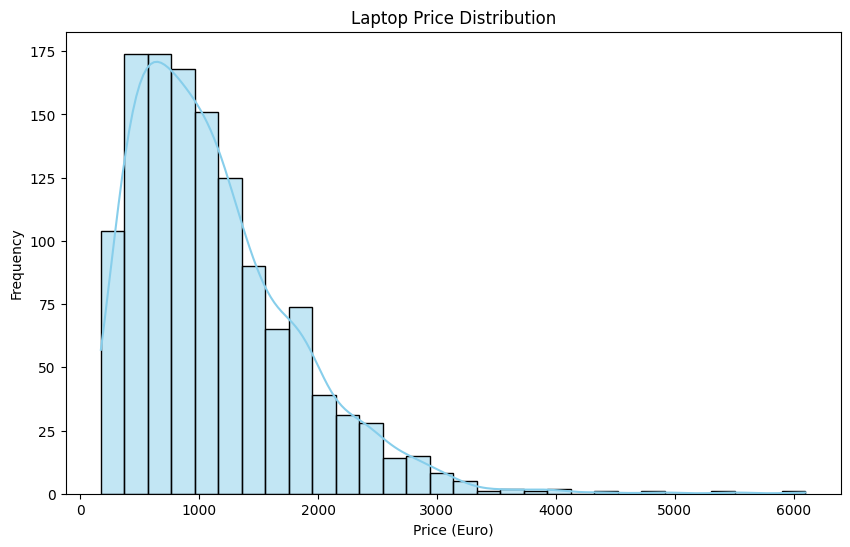

In [ ]:
# Histogram for Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(laptop_data_cleaned['Price (Euro)'], kde=True, bins=30, color='skyblue')
plt.title('Laptop Price Distribution')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.show()

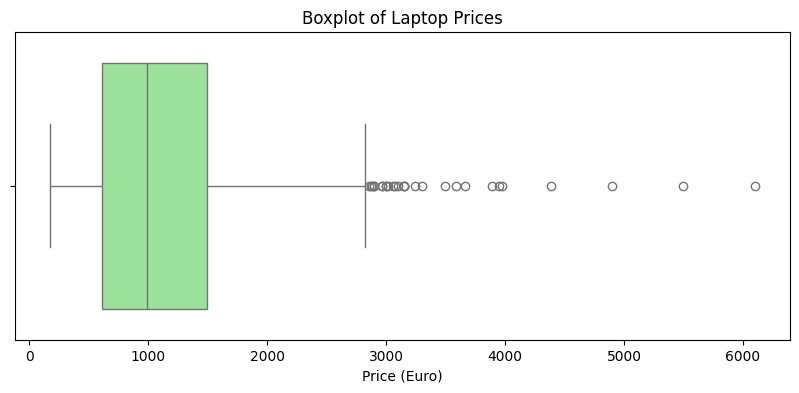

In [ ]:
# Boxplot for Price Distribution
plt.figure(figsize=(10, 4))
sns.boxplot(x=laptop_data_cleaned['Price (Euro)'], color='lightgreen')
plt.title('Boxplot of Laptop Prices')
plt.show()

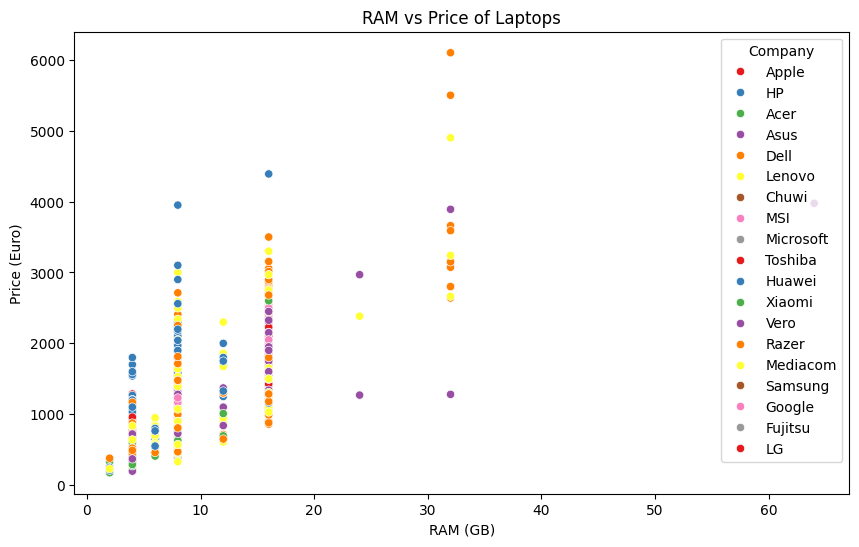

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=laptop_data_cleaned, hue='Company', palette='Set1')
plt.title('RAM vs Price of Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

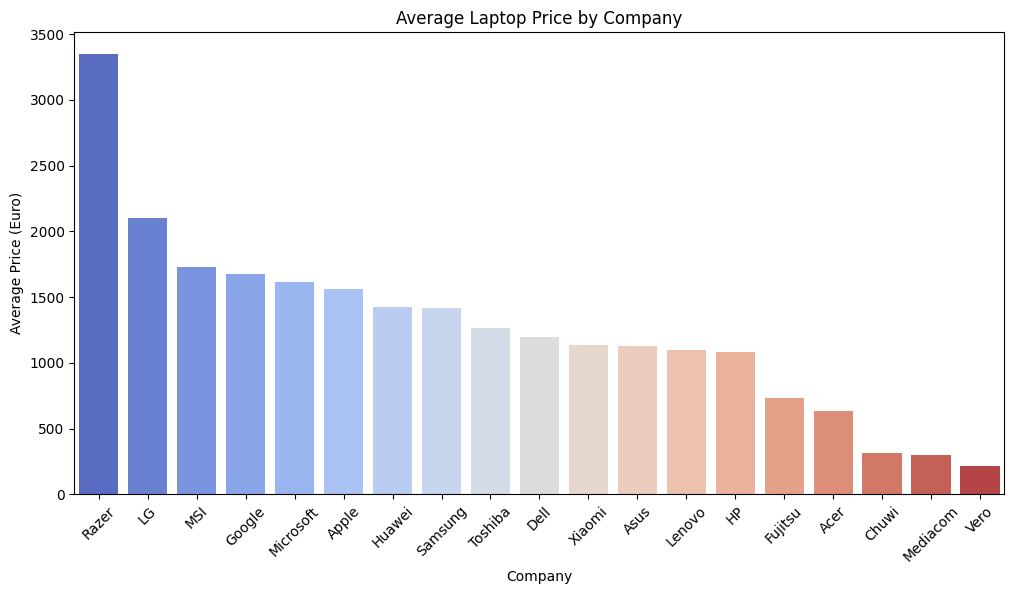

In [ ]:
plt.figure(figsize=(12, 6))
avg_price_by_company = laptop_data_cleaned.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='coolwarm')
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)
plt.show()

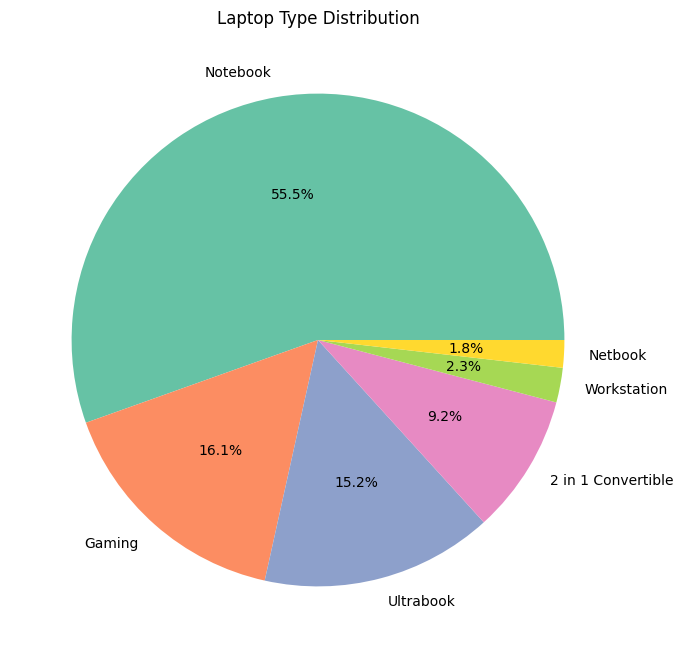

In [ ]:
# Pie chart for Laptop Type Distribution
laptop_type_counts = laptop_data_cleaned['TypeName'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(laptop_type_counts, labels=laptop_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Laptop Type Distribution')
plt.show()

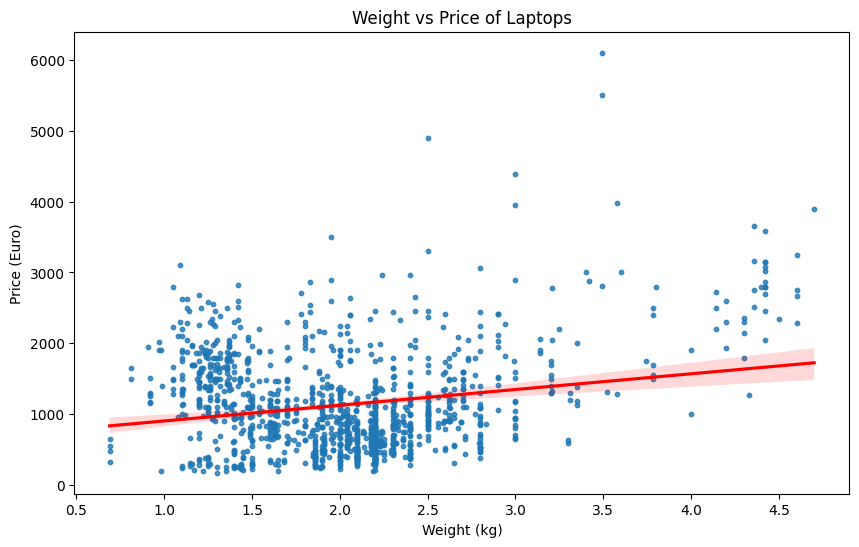

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Weight (kg)', y='Price (Euro)', data=laptop_data_cleaned, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title('Weight vs Price of Laptops')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.show()

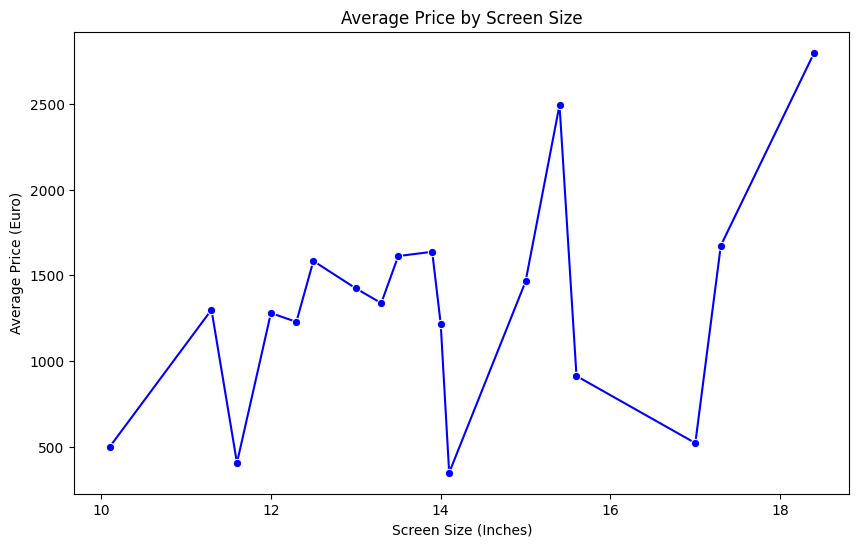

In [ ]:
# Line Chart for Average Price by Screen Size
avg_price_by_inch = laptop_data_cleaned.groupby('Inches')['Price (Euro)'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_inch.index, y=avg_price_by_inch.values, marker='o', color='blue')
plt.title('Average Price by Screen Size')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Average Price (Euro)')
plt.show()


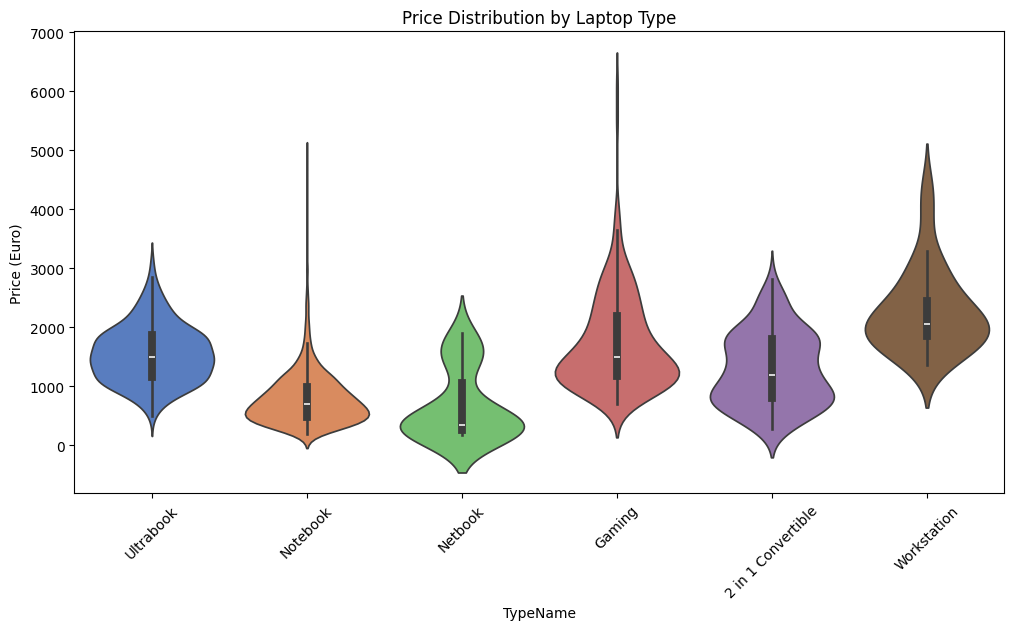

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='TypeName', y='Price (Euro)', data=laptop_data_cleaned, palette='muted')
plt.title('Price Distribution by Laptop Type')
plt.xticks(rotation=45)
plt.show()

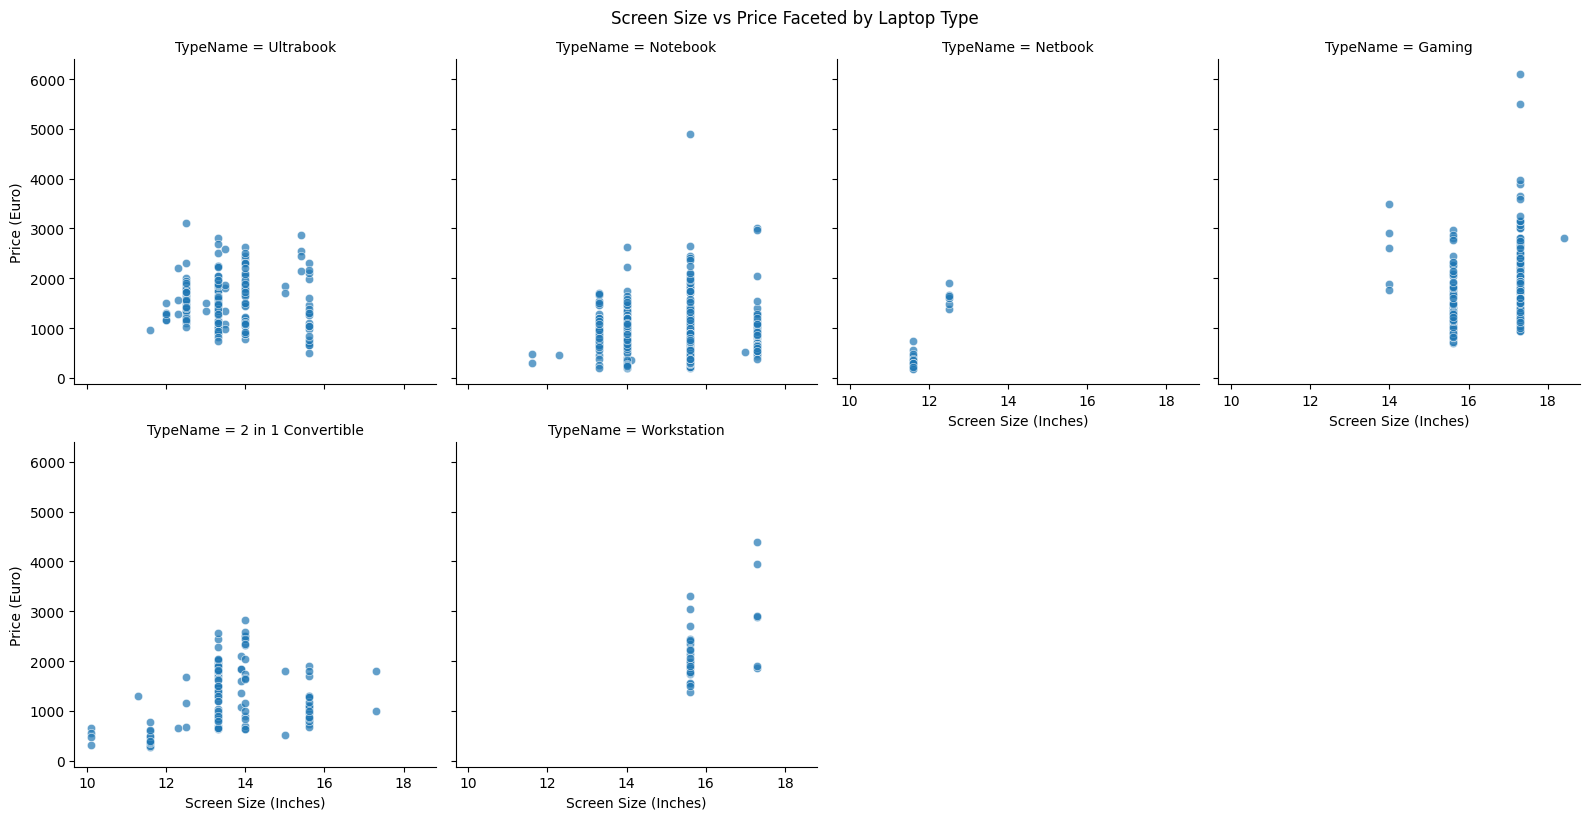

In [ ]:
# Facet Grid for Screen Size vs Price, Faceted by Laptop Type
g = sns.FacetGrid(laptop_data_cleaned, col='TypeName', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Inches', 'Price (Euro)', alpha=0.7)
g.fig.suptitle('Screen Size vs Price Faceted by Laptop Type', y=1.02)
g.set_axis_labels('Screen Size (Inches)', 'Price (Euro)')
plt.show()

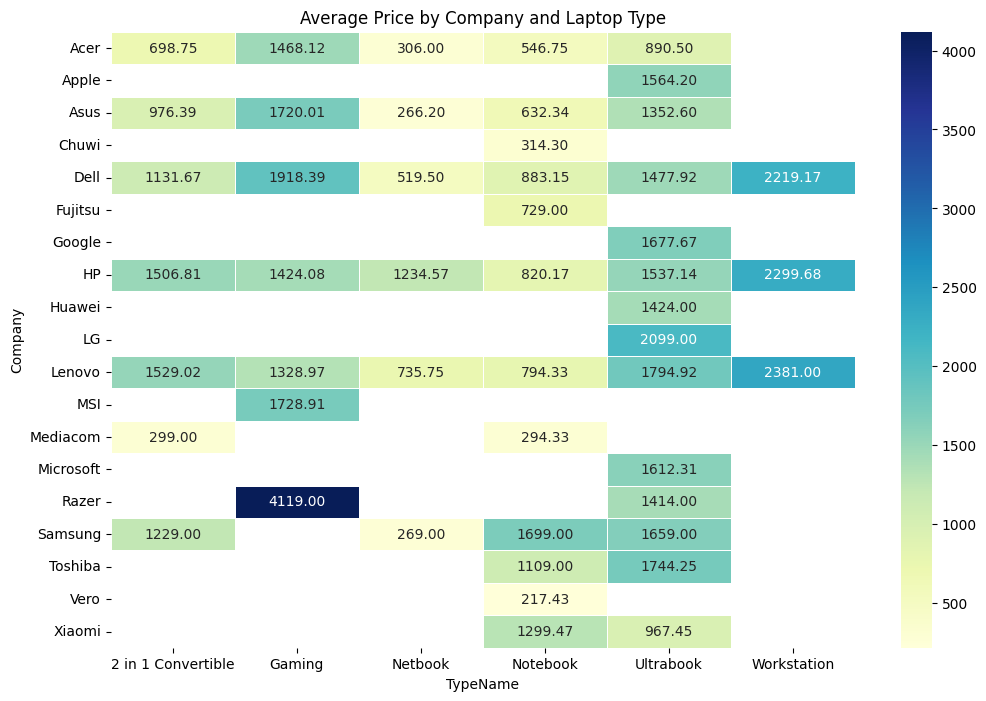

In [ ]:
# Pivot table for heatmap
price_pivot = laptop_data_cleaned.pivot_table(index='Company', columns='TypeName', values='Price (Euro)', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(price_pivot, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Price by Company and Laptop Type')
plt.show()


<Figure size 1000x800 with 0 Axes>

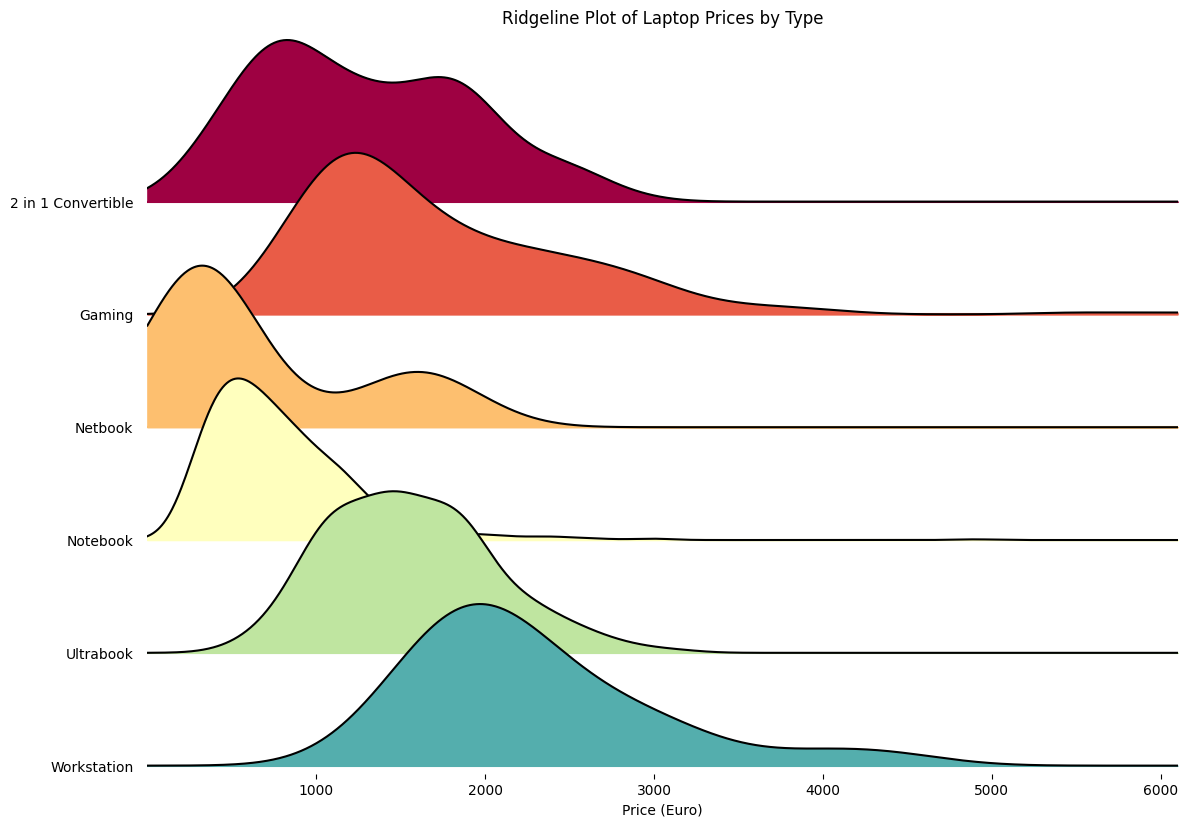

In [ ]:
plt.figure(figsize=(10, 8))
joypy.joyplot(laptop_data_cleaned, by="TypeName", column="Price (Euro)", ylim='own',
              x_range=[0, laptop_data_cleaned['Price (Euro)'].max()], figsize=(12,8), colormap=plt.cm.Spectral)
plt.title('Ridgeline Plot of Laptop Prices by Type')
plt.xlabel('Price (Euro)')
plt.show()

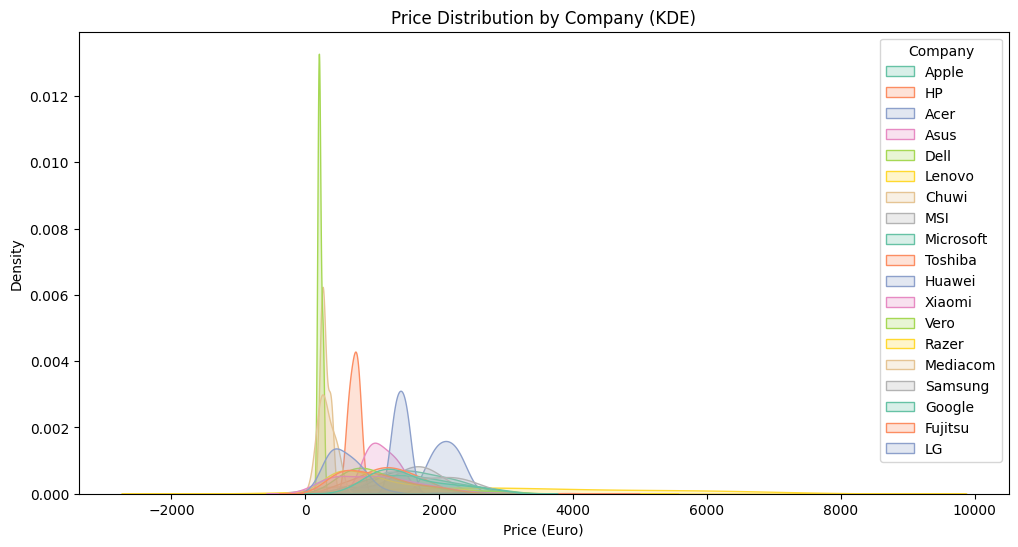

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=laptop_data_cleaned, x='Price (Euro)', hue='Company', fill=True, common_norm=False, palette='Set2')
plt.title('Price Distribution by Company (KDE)')
plt.xlabel('Price (Euro)')
plt.show()

In [ ]:
# Dropping unnecessary columns for the model and any columns with excessive object types
laptop_data_cleaned = laptop_data_cleaned.drop(columns=['Product', 'ScreenResolution'])

# Handling categorical variables using one-hot encoding
laptop_data_encoded = pd.get_dummies(laptop_data_cleaned, drop_first=True)

# Displaying the cleaned dataset structure
laptop_data_encoded.info(), laptop_data_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Columns: 240 entries, Inches to OpSys_macOS
dtypes: bool(233), float64(4), int64(3)
memory usage: 360.0 KB


(None,
    Inches  CPU_Frequency (GHz)  RAM (GB)  Weight (kg)  Price (Euro)  SSD  HDD  \
 0    13.3                  2.3         8         1.37       1339.69  128    0   
 1    13.3                  1.8         8         1.34        898.94    0    0   
 2    15.6                  2.5         8         1.86        575.00  256    0   
 3    15.4                  2.7        16         1.83       2537.45  512    0   
 4    13.3                  3.1         8         1.37       1803.60  256    0   
 
    Company_Apple  Company_Asus  Company_Chuwi  ...  GPU_Type_Radeon RX 580  \
 0           True         False          False  ...                   False   
 1           True         False          False  ...                   False   
 2          False         False          False  ...                   False   
 3           True         False          False  ...                   False   
 4           True         False          False  ...                   False   
 
    GPU_Type_UHD Graphi

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Defining the features (X) and the target variable (y)
X = laptop_data_encoded.drop(columns='Price (Euro)')
y = laptop_data_encoded['Price (Euro)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 65923.84217531834
Root Mean Squared Error (RMSE): 256.75638682478444
R-squared (R2): 0.8671798797187857


# ***Lets improve bit of accuracy by hyper parameter tuning***

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Hyperparameter Tuning using GridSearchCV for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the model
rf = RandomForestRegressor(min_samples_split=5, n_estimators=200,random_state=42)

In [ ]:
# Use Cross-Validation to check performance and prevent overfitting
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Score: {np.mean(cv_scores)}")

# Train the model
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Cross-Validation R² Score: 0.8096668640613013
Root Mean Squared Error (RMSE): 267.19159092781945
R² Score: 0.8561642209443554
